In [6]:
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time
%matplotlib inline

Llamaremos a x_train al conjunto de variables. Cada elemento de x_train es un arreglo de $m$ variables correspondiente a una mujer que se realizó un examen de cancer mamario. A su vez, cada valor de y_train, correspondiente a cada elemento de x_train, es un valor binario  que indica el diagnóstico de cada mujer. Si y_train=1, la mujer fué diagnosticada con cancer mamario. Si y_train=0, no.

Por lo tanto, x_train se puede representar como una matriz, en donde cada fila representa a una mujer que se realizó el examen y cada columna representa a una característica. A su vez, y_train se puede representar como un vector binario que indica el diagnóstico de cada mujer. En total, hay $n$ elementos en x_train y $n$ elementos en y_train. 

También se aplicará una estandarización a las variables (en x_train) usando la función scaler.transform, para que cada variable "pese" lo mismo.

In [7]:
x_train,y_train = load_breast_cancer(return_X_y=True) 
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
#X_train = np.c_[X_train, np.ones(N)] #add columns of 1's if you want 


### a)
Para llevar a cabo el algoritmo perceptrón, usaremos un vector $\overrightarrow{w}$ de $m+1$ elementos. Los primeros $m$ elemento de este vector corresponde al "peso" de cada columna de x_train, o que tán significativa es cada variable en relación al diagnóstico. El último elemento de  $\overrightarrow{w}$ es un "bias".

Llamaremos a cada fila de x_train "$\overrightarrow{x_{i}}$" ($i\in \{1,2,...,n\}$). Cada $\overrightarrow{x_{i}}$ contendrá $m$ elementos o variables. Durante cada iteración, agregaremos al $x_{i}$ correspondiente un valor 1 al final, con el fin de que se pueda multiplicar con el vector $\overrightarrow{w}$.

Para el algoritmo perceptrón, si esta multiplicación da un número positivo o cero significará que se estima un diagnóstico positivo ($\hat{y_{i}}=1$). En caso contrario, se estima un diagnóstico negativo ($\hat{y_{i}}=0$).


In [8]:
def output(x,w):#w incluye bias al final
    Y=np.dot((np.append(x,1)),w)#se agrega un uno al final del x_i para que se multiplique con el bias
    #print("Y=",Y)
    if Y>=0:
        return 1
    else:
        return 0

### b)

Ahora implementaremos el algoritmo perceptrón. En cada una de las N iteraciones se escogerá un $\overrightarrow{x_{p}}$ de x_datos (sin repetirse) y se estimará el diagnóstico usando la función definida en $a)$. Luego, se comparará el resultado $\hat{y_{p}}=0$ con el valor real en y_datos ($y_{p}$). En caso de existir un error, se actualizará el vector $\overrightarrow{w}$ en dirección contraria al error ($\hat{y_{p}}-y_{p}$), los valores de $x_{p}$ (incluyendo el 1 al final) y una constante $k \in \{0,1\}$.

En cada iteración se calculará la pérdida $L_{p}=(\hat{y_{p}}-y_{p})^{2})$, el error de entrenamiento $\hat{R}=\frac{\sum_{i=1}^{P}L_{p}}{P}$, dónde $P$ es el número actual de iteraciones que se han hecho y la pérdida total de cada iteración $J= \sum_{i=1}^{P}L_{p}$

In [9]:
def perceptron(x_train,y_train,N,k):
    print("comenzando el perceptron")
    T=time.time()
    if len(x_train)!=len(y_train):
        print("no se puede realizar el algoritmo")
        return
    if N>len(x_train):
        print("ajustando N")
        N=len(x_train)
    k=np.abs(k)
    Loss=[]
    Loss_promedio=[]
    Loss_actual=[]
    E=[]
    e=0
    w=np.random.uniform(low=-1.0, high=1.0, size=(1+x_train.shape[1],))#incluye el bias
    Datos=np.arange(len(x_train))
    np.random.shuffle(Datos)
    for i in Datos[:N]:#los indices en correspondientes a los N samples
        out=output(x_train[i],w)
        error=out-y_train[i]
        E.append(error)
        L=error**2
        e+=L
        Loss.append(L)
        la=np.sum(Loss)
        lp=np.sum(Loss)/len(Loss)
        #print("error: ",error,", perdida:",L,", perdida actual:", la, ", perdida promedio:",lp)
        Loss_actual.append(la)
        Loss_promedio.append(lp)
        w[-1]-=k*error
        w[:-1]-=(x_train[i])*k*error
    print("tiempo tardado en completar:",time.time()-T," segundos")
    print("hubieron ",e," errores de predicción en ",N, "ejemplos")
    return w,Loss,Loss_actual,Loss_promedio,E



### c)
A continuación, probaremos el algoritmo usando los datos x_train e y_train, con $N=569$ (el número total de ejemplos que hay) y la constante $k$ igual a 1.

In [10]:
N=569
k=1
w,Loss,Loss_actual,Loss_promedio,error=perceptron(x_train,y_train,N,k)

comenzando el perceptron
tiempo tardado en completar: 0.18604254722595215  segundos
hubieron  37  errores de predicción en  569 ejemplos


Visualizando el error las pérdidas registradas durante las iteraciones, podemos hacer un análisis:

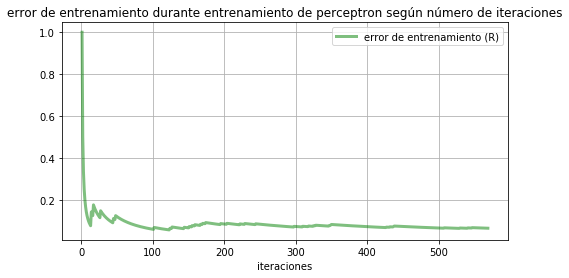

No handles with labels found to put in legend.


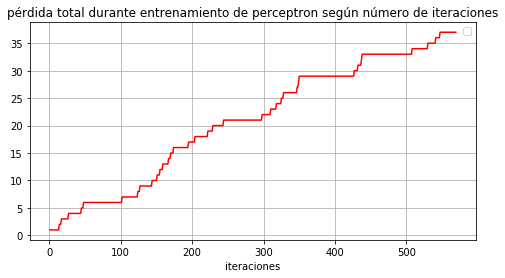

No handles with labels found to put in legend.


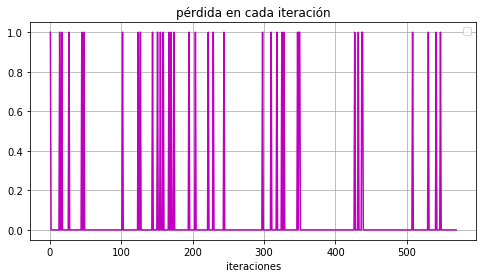

In [11]:
x=list(range(1,N+1))
plt.figure(figsize=(8,4))
plt.xlabel("iteraciones")

#plt.plot(x,error,'b-',label='error')
plt.plot(x,Loss_promedio,'g-',label='error de entrenamiento (R)',linewidth=3,alpha=0.5)



plt.legend(loc='best')
plt.title('error de entrenamiento durante entrenamiento de perceptron según número de iteraciones')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.xlabel("iteraciones")
plt.legend(loc='best')
plt.plot(x,Loss_actual,'r-',label='Pérdida total actual(J)')
plt.title('pérdida total durante entrenamiento de perceptron según número de iteraciones')
plt.grid(True)
plt.show()


plt.figure(figsize=(8,4))
plt.xlabel("iteraciones")
plt.legend(loc='best')
plt.plot(x,Loss,'m-',label='pérdida en cada iteración')
plt.title('pérdida en cada iteración')
plt.grid(True)
plt.show()

A través de los gráficos podemos concluir que el método si funciona, pero a un número determinado de iteraciones. Si son demasiadas, se corre el riesgo de que aumente el error.  En el gráfico de pérdida total, entre las 200 y las 400 iteraciones, la pérdida parece subir cada vez menos, pero luego aumenta. En el gráfico de pérdida por iteración, se registran pocas pérdidas entre las 300 y las 450 iteraciones, pero luego se registran muchas.

### d)

Una variante del algoritmo perceptrón es el algoritmo forgetrón. En este algortimo, se tendrá disposición de un conjunto $I$, inicialmente vacío, el cual contendrá a los índices de los ejemplos en los que se ha registrado un error de predicción. Además, definiremos otro vector de largo $n$ llamado $\overrightarrow{\alpha}$, cuyos valores inciálmente serán iguales a 1. El vector $\overrightarrow{w}$, inicialmente igual al vector 0, estará dado por:

$$
\overrightarrow{w}=\sum_{i\in I}{\alpha_{i}*\overrightarrow{x_{i}}}
$$

Lo que se busca en el algoritmo es que el conjunto $I$ tenga un número máximo de índices al que llamaremos $Z$. Cuando se registre un error, se insertará el índice correspondiente en el conjunto $I$ y cuando se exceda el número ($Z<|I|$) se borrará el índice de $I$ más viejo, es decir, el que se insertó antes que los demás (de ahí viene el nombre de "forgetron", el algoritmo se olvida de los valores más viejos).

Además, cada vez que se inserte un índice en $I$ se multiplicarán antes todos los $\alpha_{i}, i\in I$ por un valor $0<\phi<1$ y luego de la inserción se actualizará el vector $\overrightarrow{w}$ según la fórmula de arriba. La gracia de todo esto es que los valores de $\overrightarrow{\alpha}$ correspondientes a los índices más viejos de $I$ sean menores, al haber sido multiplicados por $\phi$ más veces. Por lo tanto, cuando se tenga que eliminar el índice más viejo de $I$ el impacto en $\overrightarrow{w}$ no será tan significativo.

In [12]:
#3

def forgetron(x_train,y_train,N,Z,k,phi):
    print("comenzando el forgetron")
    T=time.time()
    if len(x_train)!=len(y_train) or phi<0 or phi>1:
        print("no se puede realizar el algoritmo")
        return
    if N>len(x_train):
        print("ajustando N")
        N=len(x_train)
    k=np.abs(k)
    
    Loss=[]
    Loss_promedio=[]
    Loss_actual=[]
    E=[]
    e=0
    alpha=np.ones(x_train.shape[0])
    w=np.zeros(x_train.shape[1])
    d=0
    I=[]
    
    Datos=np.arange(len(x_train))
    np.random.shuffle(Datos)
    for i in Datos[:N]:#los indices en correspondientes a los N samples
        out=output(x_train[i],np.append(w,d))
        error=out-y_train[i]
        if error!=0:
            '''
            if y_train[i]<0:
                alpha[i]*=-k
            else:
                alpha[i]*=k
            '''
            for j in I:
                alpha[j]*=phi
            I.append(i)
            if len(I)>Z:
                del I[0]
            W=np.zeros(x_train.shape[1])
            for j in I:
                W+=alpha[j]*x_train[j]
            w=W
            d-=k*error
        

        E.append(error)
        L=error**2
        e+=L
        Loss.append(L)
        la=np.sum(Loss)
        lp=np.sum(Loss)/len(Loss)
        Loss_actual.append(la)
        Loss_promedio.append(lp)
        #print("error: ",error,", perdida:",L,", perdida actual:", la, ", perdida promedio:",lp)
        #print("alpha:",alpha)
        
    print("tiempo tardado en completar:",time.time()-T," segundos")
    print("hubieron ",e," errores de predicción en ",N, "ejemplos")
    return w,Loss,Loss_actual,Loss_promedio,E
    
    

## c)
A continuación probaremos el forgetrón con $N=569$, $k=1$ $Z=10$ y $\phi=0.1$

In [13]:
Z=10
k=1
phi=0.1
N=569
alpha,LossF,Loss_actualF,Loss_promedioF,errorF=forgetron(x_train,y_train,N,Z,k,phi)

comenzando el forgetron
tiempo tardado en completar: 0.12499356269836426  segundos
hubieron  151  errores de predicción en  569 ejemplos


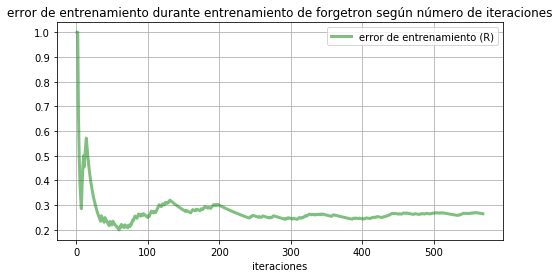

No handles with labels found to put in legend.


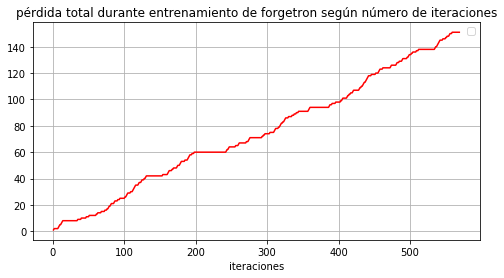

No handles with labels found to put in legend.


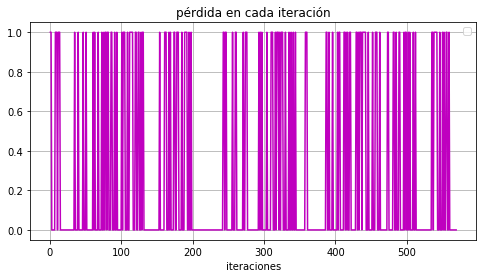

In [14]:
x=list(range(1,N+1))
plt.figure(figsize=(8,4))
plt.xlabel("iteraciones")

#plt.plot(x,error,'b-',label='error')
plt.plot(x,Loss_promedioF,'g-',label='error de entrenamiento (R)',linewidth=3,alpha=0.5)



plt.legend(loc='best')
plt.title('error de entrenamiento durante entrenamiento de forgetron según número de iteraciones')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.xlabel("iteraciones")
plt.legend(loc='best')
plt.plot(x,Loss_actualF,'r-',label='Pérdida total actual(J)')
plt.title('pérdida total durante entrenamiento de forgetron según número de iteraciones')
plt.grid(True)
plt.show()


plt.figure(figsize=(8,4))
plt.xlabel("iteraciones")
plt.legend(loc='best')
plt.plot(x,LossF,'m-',label='pérdida en cada iteración')
plt.title('pérdida en cada iteración')
plt.grid(True)
plt.show()

Por lo visto, el método funciona, pero está muy lejos de más eficiente que el perceptrón. Mientras que de los 569 casos de ejemplo, menos de 50 resultaron en error en el perceptrón, mientras acá ya superaron con creces los 100 errores. Si ejecutamos el forgetrón varias veces (considerando que la implementación del algoritmo hecha acá toma a los ejemplos en un orden aleatorio) y analizando los gráficos resultantes, notaremos que parece existir un rango de iteraciones en las que hay que parar de hacer casos de prueba para lograr un mejor nivel de predicción.

En cuanto al tiempo de ejecución, el forgetrón es aproxiaádamente el doble de rápido que el perceptrón, aunque la eficiencia en cuanto a tiempo no compensa a la eficiencia en cuanto a predicciones (entre 100 y 200 iteraciones).

### f)
Se lleva a cabo la implementación del algoritmo perceptrón haciendo uso de otra función objetivo, la llamada función sigmoidal. Cabe recalcar que los formatos para los distinto vectores utilizados siguen siendo usados en la implementación de este perceptrón.

La función sigmoidal se original a partir de los log-odds. Esta vez se enfatiza el enfoque en la función de probabilidades condicionadas correspondientes a las etiquetas, dada una entrada ${x_{i}}$, perteneciente al la primera componente del vector de entrenamiento.

Debido a la velocidad de crecimiento de la función exponencial, la cual se ve implementada en la nueva función objetivo, se decide acotar superiormente la magnitud que esta variable puede tomar.

In [15]:
#parte 2
#f
def sigma(xi):
    if xi>40:
        xi=40
    return (1/(1+(np.e**-xi)))

def output_sigma(x,w):
    Y=np.dot((np.append(x,1)),w)
    return sigma(Y)    

### g)
Se lleva a cabo la implementación de la nueva función de pérdida, considerando la utilización de las funciones del apartado f). Al igual que en la sección anterior, debido al comportamiento de la función logaritmo es que se deciden acotar los valores a evaluar en dicha función.


In [16]:
#g
def loss_sigma(x,y,w):
    sigma=output_sigma(x,w)
    if sigma < 0:
        sigma=np.abs(xi)
        return -y*np.log(sigma)-(1-y)*np.log(1-sigma)
    elif sigma == 1:
        return -y*np.log(1)-(1-y)*np.log(1-0.9)
    elif sigma == 0:
        return -y*np.log(0.1)-(1-y)*np.log(1)
    else:
        return -y*np.log(sigma)-(1-y)*np.log(1-sigma)

### h)
La función escrita a continuación calcula el gradiente de la función de pérdida para parámetros $w$, $x_{\{i\}}$ e $ y_{\{i\}}$ dados.

Al igual que en las secciones anteriores, dado el comportamiento de ciertas funciones, se acotan los valores $\xi$ ("xi") y $\sigma$ ("sigma"), además de redondear estos mismos valores.


In [17]:
#h
def gradiente_loss(x,y,w):
    sigma = output_sigma(x,w)
    xi=np.dot((np.append(x,1)),w)
    xi = np.around(xi, decimals=2)
    #print ("sigma: ",sigma)
    if xi > 40:
        xi=40
    elif xi < -100:
        xi=-40
    #print ("xi: ",xi)
    if sigma == 0:
        return ((y/(0.1)) + ((1-y)/(1-sigma)))*((np.e**(-xi))/(np.square(1+np.e**(-xi))))*x
    elif sigma == 1:
        return ((y/sigma) + ((1-y)/(1-0.9)))*((np.e**(-xi))/(np.square(1+np.e**(-xi))))*x
    else:
        return ((y/sigma)) + ((1-y)/(1-sigma))*((np.e**(-xi))/(np.square(1+np.e**(-xi))))*x

### i)
Para la versión modificada del perceptrón, se itera sobre N datos. En cada iteración se calcula el valor de la nueva función de pérdida "loss_sigma" obteniendo así valores para las pérdidas actuales, promedios y totales. Al final de cada ciclo, se corrige el parámetro ${w}$ mediante el uso algoritmo de optimización SGD (Stochastic Gradient Descend), haciendo uso de la función del grandiente previamente escrita.

In [18]:
def modi_perceptron(x_train,y_train,N,eta):
    print("comenzando el perceptron modificado")
    T=time.time()
    if len(x_train)!=len(y_train):
        print("no se puede realizar el algoritmo")
        return
    if N>len(x_train):
        print("ajustando N")
        N=len(x_train)
    eta=np.abs(eta)
    Loss=[]
    Loss_promedio=[]
    Loss_actual=[]
    w=np.random.uniform(low=-1.0, high=1.0, size=(1+x_train.shape[1],))#incluye el bias
    Datos=np.arange(len(x_train))
    np.random.shuffle(Datos)
    for i in Datos[:N]:#los indices en correspondientes a los N samples
        out=output_sigma(x_train[i],w)
        L=loss_sigma(x_train[i],y_train[i],w)
        #print ("loss: ",L)
        Loss.append(L)
        la=np.sum(Loss)
        lp=np.sum(Loss)/len(Loss)
        #print("error: ",error,", perdida:",L,", perdida actual:", la, ", perdida promedio:",lp)
        Loss_actual.append(la)
        Loss_promedio.append(lp)
        grad=gradiente_loss(x_train[i],y_train[i],w)
        np.around(grad, decimals=2)
        w-=eta*(np.append(grad,1))
       # print("w: ",w)
    #print("W: ",w)
    print("loss: ",Loss,"len: ",len(Loss))
    print("loss actual: ",Loss_actual,"len: ",len(Loss_actual))
    #print("loss promedio: ",Loss_promedio,"len: ",len(Loss_promedio))
    #print("tiempo tardado en completar:",time.time()-T," segundos")
    return w,Loss,Loss_actual,Loss_promedio

In [19]:
N=100
eta=0.6
w,Loss_mod,Loss_actual_mod,Loss_promedio_mod=modi_perceptron(x_train,y_train,N,eta)
x=list(range(1,N+1))

comenzando el perceptron modificado
loss:  [2.9064547820345674, 0.21849910515344204, 5.227491412721979e-07, 0.00021023610832099254, 5.885771560916724, 1.045997289331461e-09, 7.939084516303715e-08, -0.0, 1.4994441598646138, 2.6090942840914915, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 6.342825489157703e-06, 0.0, 0.0, 24.8122794742761, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 2.3025850929940455, 0.0, 0.0, 2.3025850929940455, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 2.3025850929940455, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 2.302585092994046, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 2.3025850929940455, 0.0, 0.0, 0.0, 0.0, 2.3025850929940455, 0.0, 0.0, -0.0, 0.0, 2.3025850929940455, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 2.3025850929940455, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0] len:  100
loss actual:  [2.9064547820345674, 3.1249538871880094, 3.1249544099371507, 3.1251646460454716, 9.010936206962196, 9.0109

C:\Users\ValderasUribe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


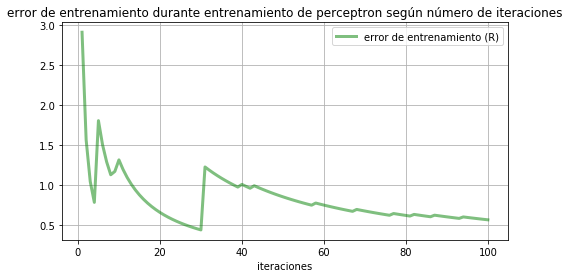

No handles with labels found to put in legend.


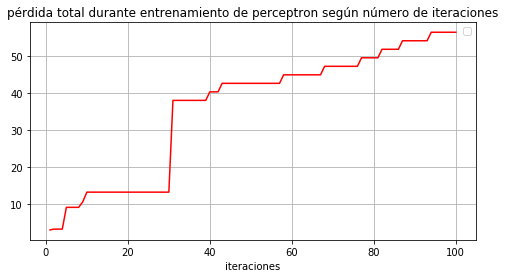

No handles with labels found to put in legend.


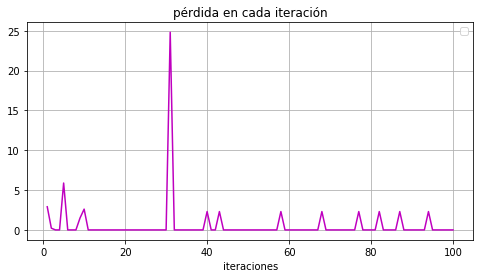

In [20]:
x=list(range(1,N+1))
plt.figure(figsize=(8,4))
plt.xlabel("iteraciones")

#plt.plot(x,error,'b-',label='error')
plt.plot(x,Loss_promedio_mod,'g-',label='error de entrenamiento (R)',linewidth=3,alpha=0.5)



plt.legend(loc='best')
plt.title('error de entrenamiento durante entrenamiento de perceptron según número de iteraciones')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.xlabel("iteraciones")
plt.legend(loc='best')
plt.plot(x,Loss_actual_mod,'r-',label='Pérdida total actual(J)')
plt.title('pérdida total durante entrenamiento de perceptron según número de iteraciones')
plt.grid(True)
plt.show()


plt.figure(figsize=(8,4))
plt.xlabel("iteraciones")
plt.legend(loc='best')
plt.plot(x,Loss_mod,'m-',label='pérdida en cada iteración')
plt.title('pérdida en cada iteración')
plt.grid(True)
plt.show()

Se puede ver que el error efectivamente disminuye hasta cero a medida que pasan iteraciones. Sin embargo existen iteraciones en las cuales se presentan una gran pérdida, sin embargo esta es mínima con respecto al máximo de iteraciones. Por la sensibilidad del promedio, este se ve altamente medida se ve muy alterada.